In [1]:
!pip install scikit-learn

In [2]:
!pip install opencv-python

In [3]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [9]:
df = df.loc[df["id"].str.startswith('00',na = False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [10]:
num_classes

13589

In [11]:
num_data

16157

In [12]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace = True)

In [13]:
data.head()

,landmark_id,count
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12


In [14]:
data.tail()

,landmark_id,count
13584,54986,1
13585,182355,1
13586,25204,1
13587,100559,1
13588,63972,1


In [15]:
data.columns = ['landmark_id','count']

In [16]:
data

,landmark_id,count
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12
...,...,...
13584,54986,1
13585,182355,1
13586,25204,1
13587,100559,1


In [17]:
data['count'].describe()

count    13589.000000
mean         1.188976
std          0.727458
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
Name: count, dtype: float64

(array([0.0000e+00, 1.1789e+04, 0.0000e+00, 1.3960e+03, 2.5400e+02,
        0.0000e+00, 7.6000e+01, 3.4000e+01, 0.0000e+00, 2.0000e+01,
        9.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

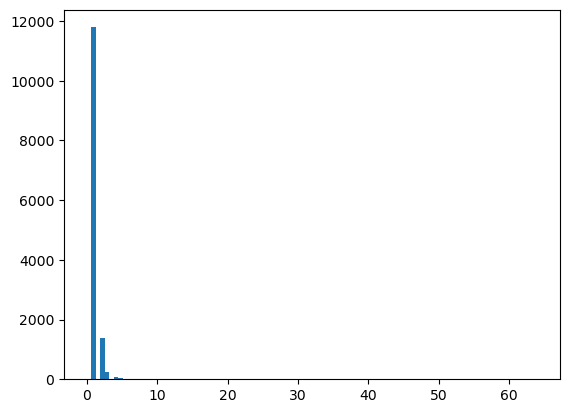

In [18]:
plt.hist(data['count'],100,range = (0,64),label = 'Test')

In [19]:
data['count'].between(0,5).sum()

13549

In [20]:
data['count'].between(5,10).sum()

69

In [21]:
data['count'].between(10,15).sum()

5

(array([610., 672., 620., 676., 695., 686., 600., 713., 583., 635., 641.,
        628., 585., 615., 613., 701., 596., 685., 624., 628., 674., 727.,
        641., 670., 639.]),
 array([     0.  ,   8122.92,  16245.84,  24368.76,  32491.68,  40614.6 ,
         48737.52,  56860.44,  64983.36,  73106.28,  81229.2 ,  89352.12,
         97475.04, 105597.96, 113720.88, 121843.8 , 129966.72, 138089.64,
        146212.56, 154335.48, 162458.4 , 170581.32, 178704.24, 186827.16,
        194950.08, 203073.  ]),
 <BarContainer object of 25 artists>)

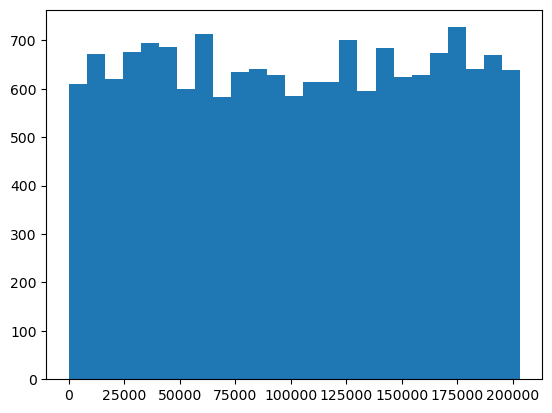

In [22]:
plt.hist(df["landmark_id"], bins ='auto')

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(df["landmark_id"])

LabelEncoder()

In [24]:
df

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937
...,...,...,...
4131341,0069f71dc6c5dac0,http://upload.wikimedia.org/wikipedia/commons/...,51272
4131349,00f1aecb6c90b551,https://upload.wikimedia.org/wikipedia/commons...,63972
4131698,00de9755a042c271,https://upload.wikimedia.org/wikipedia/commons...,73064
4132109,009cb0761e9b3ce1,https://upload.wikimedia.org/wikipedia/commons...,68657


In [25]:
df.drop('url',axis = 1)

,id,landmark_id
108,0036d78c05c194d9,50089
172,00c08b162f34f53f,163404
710,00e5d77c905d94a6,26066
1256,00c8dba0df4d112a,35744
1262,001cd787f1e9a803,61937
...,...,...
4131341,0069f71dc6c5dac0,51272
4131349,00f1aecb6c90b551,63972
4131698,00de9755a042c271,73064
4132109,009cb0761e9b3ce1,68657


In [26]:
def encode_label(label):
    return labelencoder.transform(label)

In [27]:
def decode_label(label):
    return labelencoder.inverse_transform(label)

In [28]:
def get_image(num, df):
    row = df.iloc[num, :]
    
    if len(row) == 2:
        fname, label = row
    else:
        fname = row[0]
        label = None  # You may want to adjust this based on your DataFrame structure
    
    f1, f2, f3 = fname[0], fname[1], fname[2]
    path = os.path.join("./images.tar", f1, f2, f3, fname)
    
    img = cv2.imread(path)
    
    if img is None:
        # Handle the case where the image cannot be loaded
        print(f"Error loading image: {path}")
        return None, label
    
    return img, label


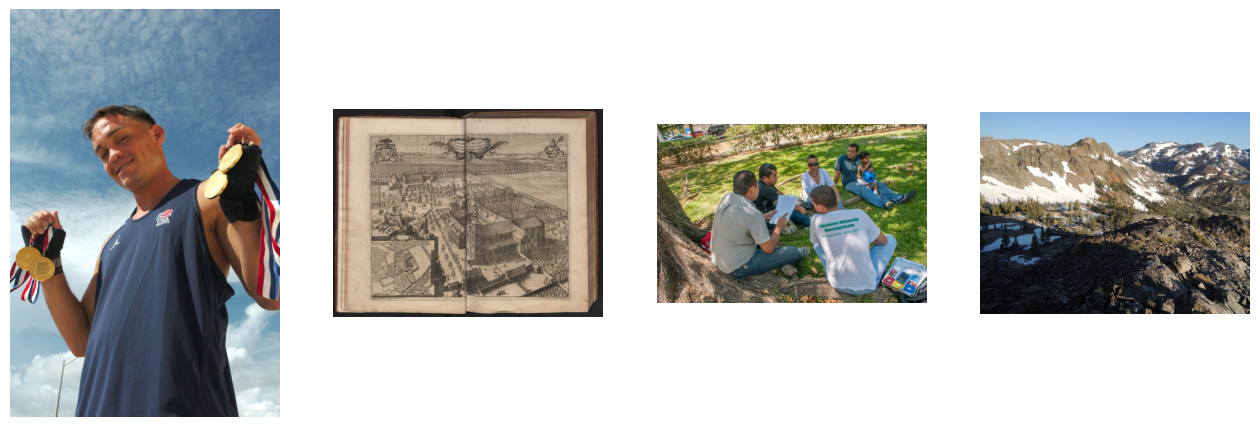

In [29]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import numpy as np
import tarfile

tar_file_path = "./images.tar"
extracted_folder = "./extracted_images"

with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(extracted_folder)
fig = plt.figure(figsize=(16, 16))
for i in range(1, 5):
    ring = random.choices(os.listdir(extracted_folder), k=3)
    folder = os.path.join(extracted_folder, ring[0], ring[1], ring[2])
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(os.path.join(folder, random_img)))
    ax = fig.add_subplot(1, 4, i)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [30]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [31]:
#Parameters

learning_rate = 0.001
decay_speed = 10.6
momentum = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights = None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

In [32]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation = "softmax"))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)

In [33]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=learning_rate),loss = loss_function,metrics = ['accuracy'])

In [34]:
import cv2

def img_reshape(img, size):
    # Resize the image
    resized_img = cv2.resize(img, size)

    # Normalize the image
    normalized_img = resized_img / 255.0

    return normalized_img


In [35]:
def get_batch(dataframe, start, batch_size):
    img_array = []
    len_array = []

    end_image = start + batch_size
    if end_image > len(dataframe):
        end_image = len(dataframe)

    for idx in range(start, end_image):
        n = idx
        img, label = get_image(n, dataframe)
        img = img_reshape(img, (224, 224))  # Using the updated img_reshape function

        img_array.append(img)
        len_array.append(label)

    len_array = encode_label(len_array)

    return np.array(img_array), np.array(len_array)


In [36]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

train,val = np.split(df.sample(frac = 1),[int(0.8*len(df))])
print(len(train))
print(len(val))

12925
3232


In [37]:
def get_batch(dataframe, start, batch_size):
    img_array = []
    len_array = []

    end_image = start + batch_size
    if end_image > len(dataframe):
        end_image = len(dataframe)

    for idx in range(start, end_image):
        n = idx
        img, label = get_image(n, dataframe)

        # Check if the image is None (i.e., not loaded successfully)
        if img is not None:
            img = img_reshape(img, (224, 224))  # Using the updated img_reshape function
            img_array.append(img)
            len_array.append(label)

    len_array = encode_label(len_array)

    return np.array(img_array), np.array(len_array)


In [38]:
#Test
batch_size = 16

errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val,Y_val = get_batch(val, it*batch_size, batch_size)
    print("Shape of X_val:", X_val.shape)

    # Ensure X_val is not empty
    if X_val.shape[0] == 0:
        print("X_val is empty. Check your data loading process.")
    else:
        result = model.predict(X_val) 
        cla = np.argmax(result,axis = 1)
        for idx,res in enumerate(result):
            if cla[idx] != Y_val[idx]:
                errors = errors +1
                bad_preds.append([batch_size*it + idx,cla[idx], res[cla[idx]]])
            else:
                good_preds.append([batch_size*it + idx,cla[idx], res[cla[idx]]])

Error loading image: ./images.tar\0\0\4\004ccb45447b3872
Error loading image: ./images.tar\0\0\0\000c8f4c7b0f0c0f
Error loading image: ./images.tar\0\0\a\00a10c952db36da0
Error loading image: ./images.tar\0\0\5\005a14b48cbebbcb
Error loading image: ./images.tar\0\0\0\00039c666f8e9efc
Error loading image: ./images.tar\0\0\d\00dd21986206115f
Error loading image: ./images.tar\0\0\c\00cd9d47eaa2a638
Error loading image: ./images.tar\0\0\9\0099507d421b48c6
Error loading image: ./images.tar\0\0\2\002a339a0b24c48c
Error loading image: ./images.tar\0\0\b\00b31ce109953fba
Error loading image: ./images.tar\0\0\5\005bb18c27e85811
Error loading image: ./images.tar\0\0\e\00e04c75198f6e33
Error loading image: ./images.tar\0\0\d\00d1fa1993d68df4
Error loading image: ./images.tar\0\0\0\0005b8840b41b78b
Error loading image: ./images.tar\0\0\a\00a1d817607fe176
Error loading image: ./images.tar\0\0\4\00467c28c1568a30
Shape of X_val: (0,)
X_val is empty. Check your data loading process.
Error loading imag

In [39]:
fig = plt.figure(figsize=(16, 16))

for i in range(1, min(6, len(good_preds))):  # Use min to avoid accessing out-of-range indices
    n = int(good_preds[i][0]) if i < len(good_preds) else 0  # Use conditional to handle incomplete data
    img, lbl = get_image(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ax = fig.add_subplot(1, 5, i)
    ax.imshow(img)
    
    lbl2 = int(good_preds[i][1]) if i < len(good_preds) else 0  # Use conditional to handle incomplete data
    sample_cnt = list(df['landmark_id']).count(lbl)
    
    ax.set_title(f"Label: {lbl}\nClassified as: {decode_label(lbl2)}\nSample in class {lbl}: {sample_cnt}")
    ax.axis('off')

plt.show()


<Figure size 1600x1600 with 0 Axes>